Qn1. Machine Learning models on elections data.

In [2]:
#import numpy, pandas and eda related packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#import train test split.
from sklearn.model_selection import train_test_split

#LogisticRegression
from sklearn.linear_model import LogisticRegression

#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('sklearn version:', sklearn.__version__)

Numpy version: 1.21.5
Pandas version: 1.4.4
sklearn version: 1.0.2


1.1

Read the dataset. 

Describe the data briefly.

Interpret the inferences for each.

Initial steps like head() .info(), Data Types, etc . 

Null value check, 

Summary stats,

Skewness must be discussed.

In [4]:
election_df = pd.read_excel('Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')

In [5]:
election_df.shape

(1525, 10)

In [6]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
election_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
election_df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5. 1 - poor economic conditions. 5 - high economic conditions

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5. 1- poor household conditions, 5 - rich house hold exonomic conditions

5. Blair: Name of person contesting from Labour party. Assessment of the Labour leader, 1 to 5. score given by person to Blair 1 - low 5 - high

6. Hague: Name of person contesting from Conservative party. Assessment of the Conservative leader, 1 to 5. score given by person to Hague. 1 - low, 5 - high

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. it corresponds to the voter.

8. political.knowledge: Knowledge of parties' positions on European integration by the voter, 0 to 3.

9. gender: female or male.

we don't need the unnamed column so dropping it.

In [9]:
election_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [11]:
election_df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [12]:
election_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [13]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [14]:
election_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
#except age all other datatypes seem to be categories
#converting all other columns into categories.
#columns = ['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
#for i in columns:
#    election_df[i]  = pd.Categorical(election_df[i])

In [16]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [17]:
election_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
election_df.duplicated().sum()

8

In [19]:
#drop duplicates
election_df.drop_duplicates(inplace = True)

In [20]:
election_df.duplicated().sum()

0

In [21]:
election_df.shape

(1517, 9)

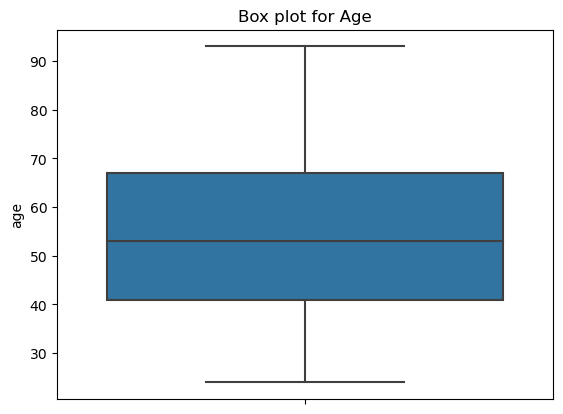

In [22]:
plt.title('Box plot for Age')
sns.boxplot(y = 'age', data = election_df);

In [23]:
#no skewness at all

In [24]:
cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
for i in cat_columns:
    election_df[i] = pd.Categorical(election_df[i])
election_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   category
 3   economic.cond.household  1517 non-null   category
 4   Blair                    1517 non-null   category
 5   Hague                    1517 non-null   category
 6   Europe                   1517 non-null   category
 7   political.knowledge      1517 non-null   category
 8   gender                   1517 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 57.7+ KB


1.2 
EDA
 - Univariate analysis - outlier check for Age and discuss outliers and steps needed to be taken if there.
   - categorical - count/pie charts
   - numerical - histogram/boxplots
 - Bivariate analysis
   - age with all other numeric variables
   - all other categorical variables with target variable (vote)
 - Multivariate analysis
   - age and vote with all other categorical variables
   - vote with other two categorical variable combinations
  
- any graphs based on framing an analytics problem.

In [222]:
#Univariate analysis

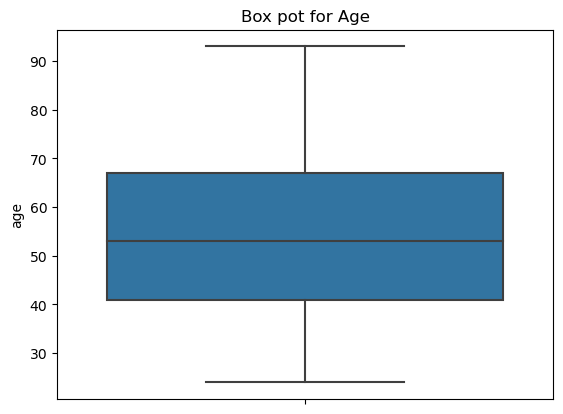

In [223]:
plt.title('Box pot for Age')
sns.boxplot(y = 'age', data = election_df);

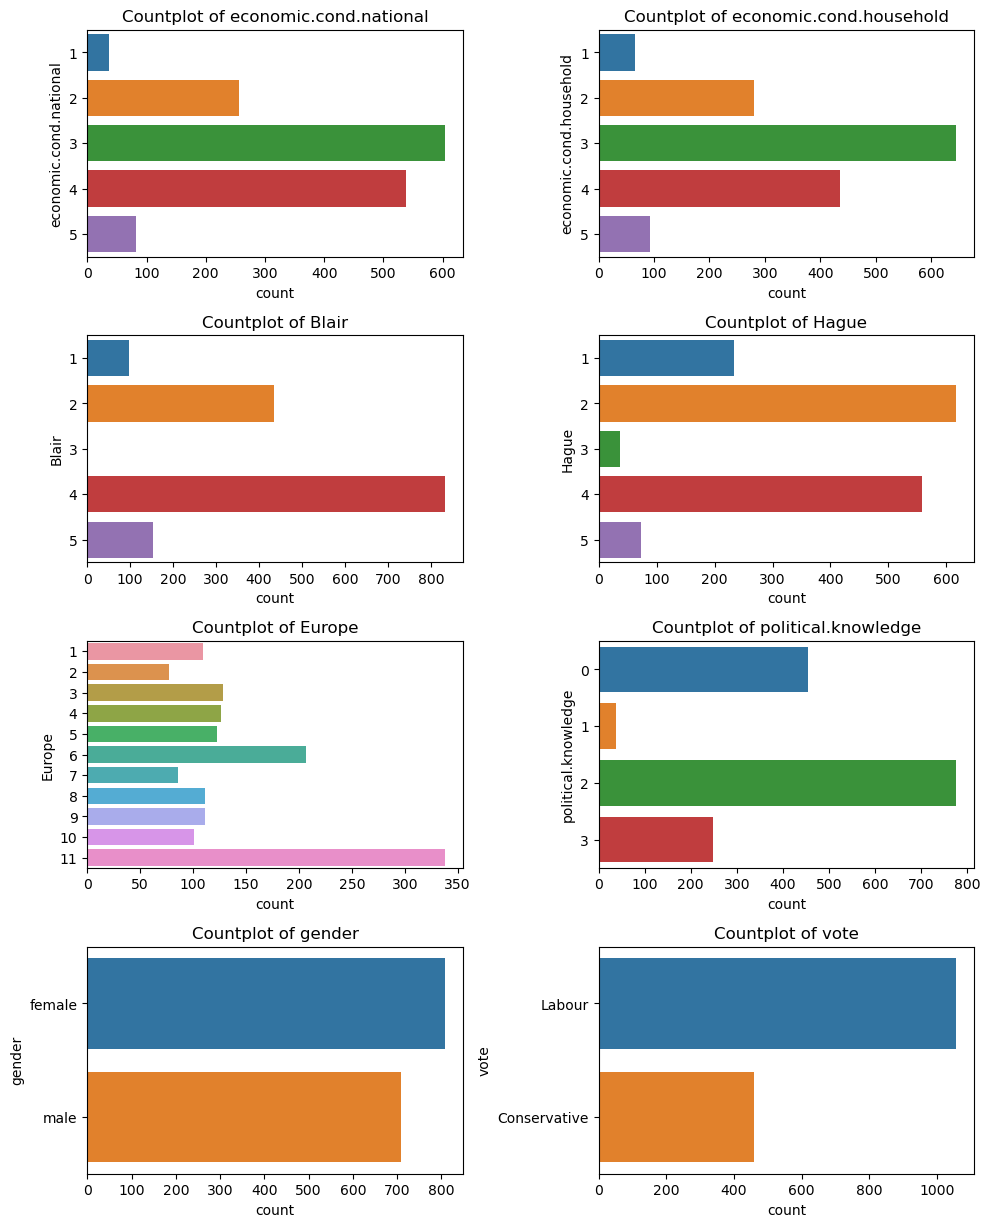

In [224]:
cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender', 'vote']
plt.figure(figsize = (10,15))
for i in range(len(cat_columns)):
    plt.subplot(5, 2, i+1)
    plt.title('Countplot of '+ cat_columns[i])
    sns.countplot(y = election_df[cat_columns[i]], data = election_df)
    plt.tight_layout()

In [225]:
cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender', 'vote']
plt.figure(figsize = (10,20))
for i in range(len(cat_columns)):
    print('\nValue counts for', cat_columns[i],'\n')
    print(election_df[cat_columns[i]].value_counts())


Value counts for economic.cond.national 

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

Value counts for economic.cond.household 

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

Value counts for Blair 

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

Value counts for Hague 

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

Value counts for Europe 

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

Value counts for political.knowledge 

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

Value counts for gender 

female    808
male      709
Name: gender, dtype: int64

Value counts for vote 

Labour          1057
Conservative     460
Name: vote, dtype: int64


<Figure size 1000x2000 with 0 Axes>

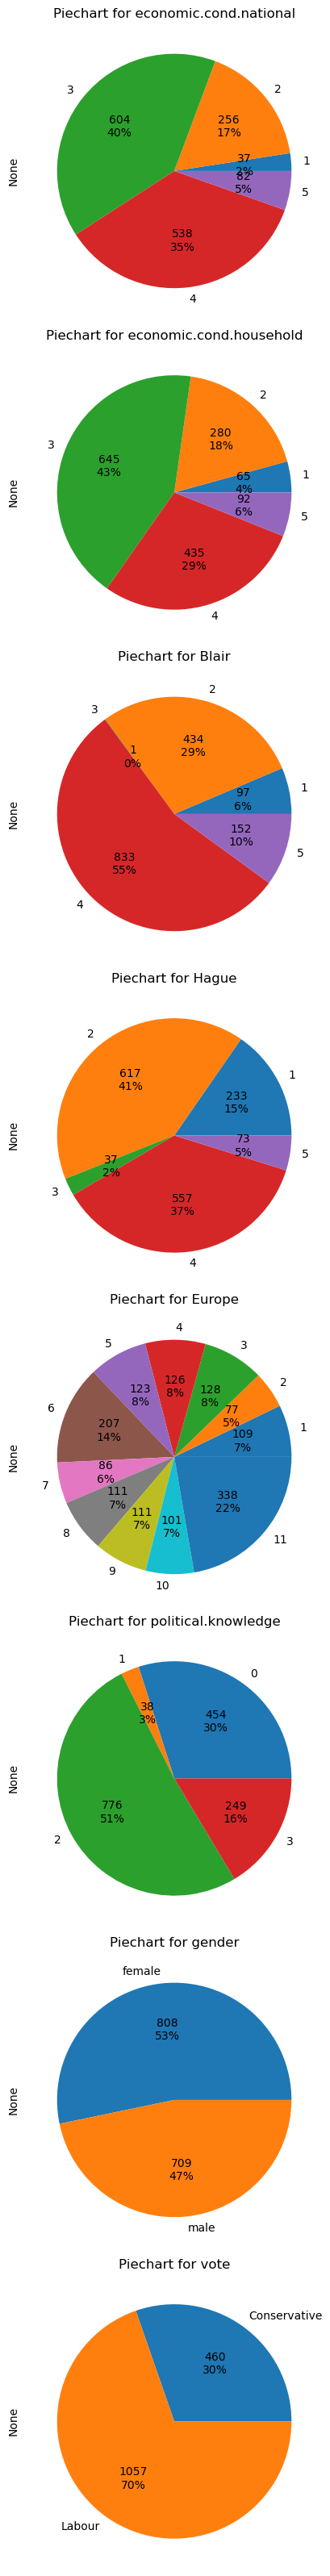

In [226]:
def label_function(val):
    return f'{val / 100 * len(election_df):.0f}\n{val:.0f}%'

cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender', 'vote']
plt.figure(figsize = (40,40))
for i in range(len(cat_columns)):
    plt.subplot(10, 1, i+1)
    plt.title('Piechart for '+ cat_columns[i])
    election_df.groupby(cat_columns[i]).size().plot(kind='pie', autopct=label_function)
    plt.tight_layout()

Bivariate analysis:

<AxesSubplot:title={'center':'Age distribution voters voted for each party'}, xlabel='vote', ylabel='age'>

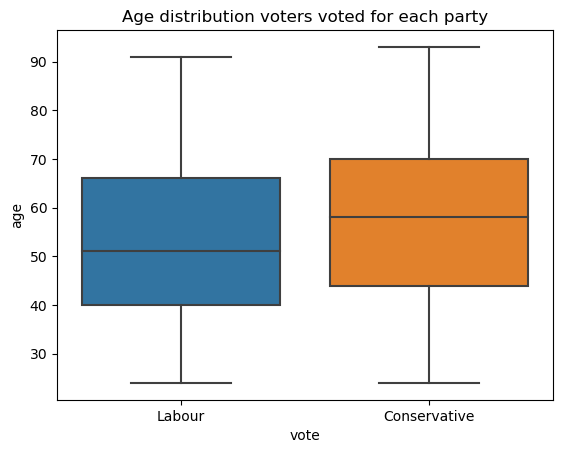

In [227]:
plt.title('Age distribution voters voted for each party')
sns.boxplot(y = 'age', x = 'vote', data = election_df)

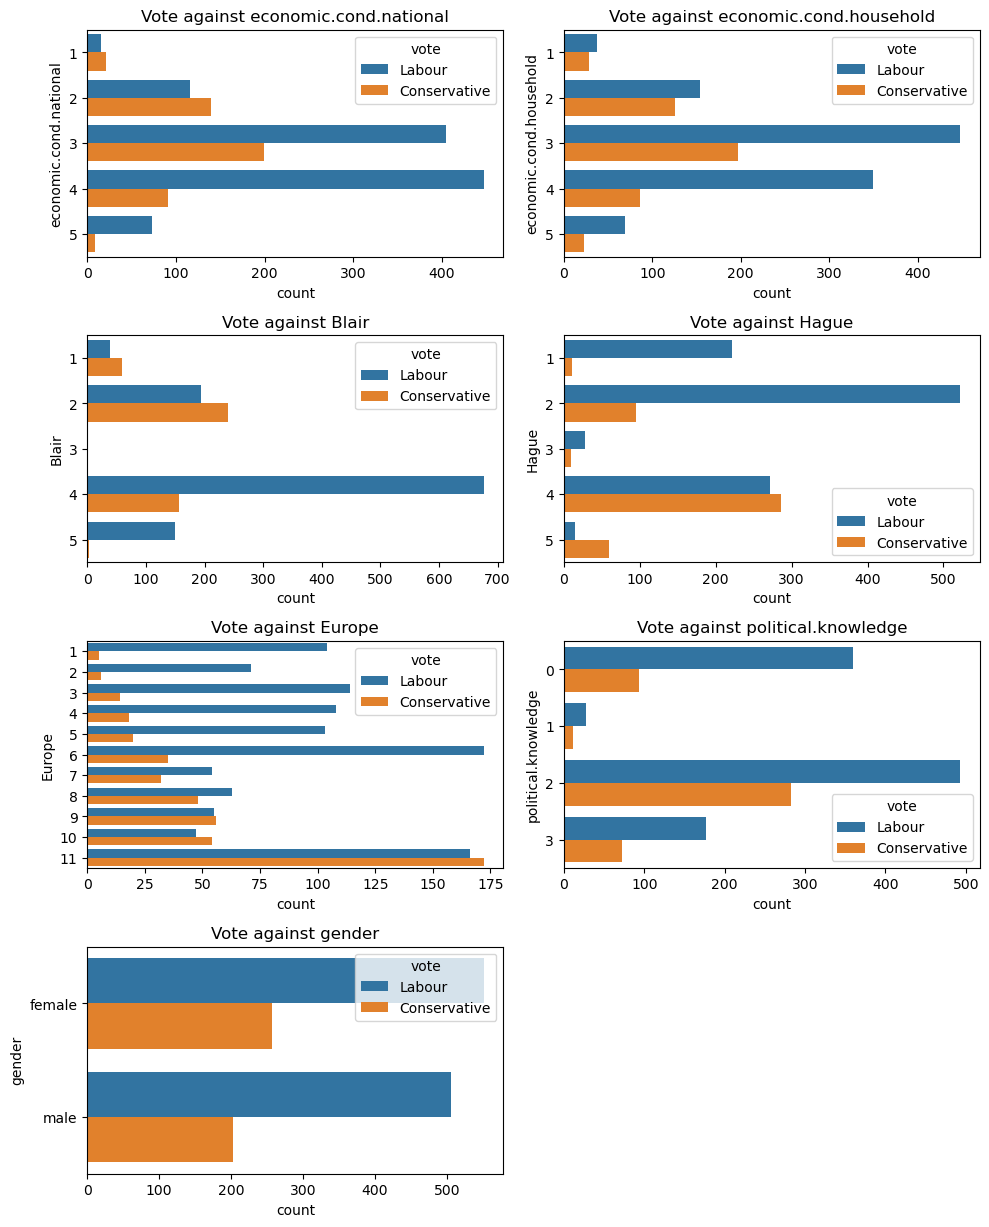

In [228]:
cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
plt.figure(figsize = (10,15))
for i in range(len(cat_columns)):
    plt.subplot(5, 2, i+1)
    plt.title('Vote against ' + cat_columns[i])
    sns.countplot(y = election_df[cat_columns[i]], hue = 'vote', data = election_df)
    plt.tight_layout()

Multivariate analysis

In [229]:
#age and vote with all other categorical variables

In [230]:
#vote and each categorical pair combinations.

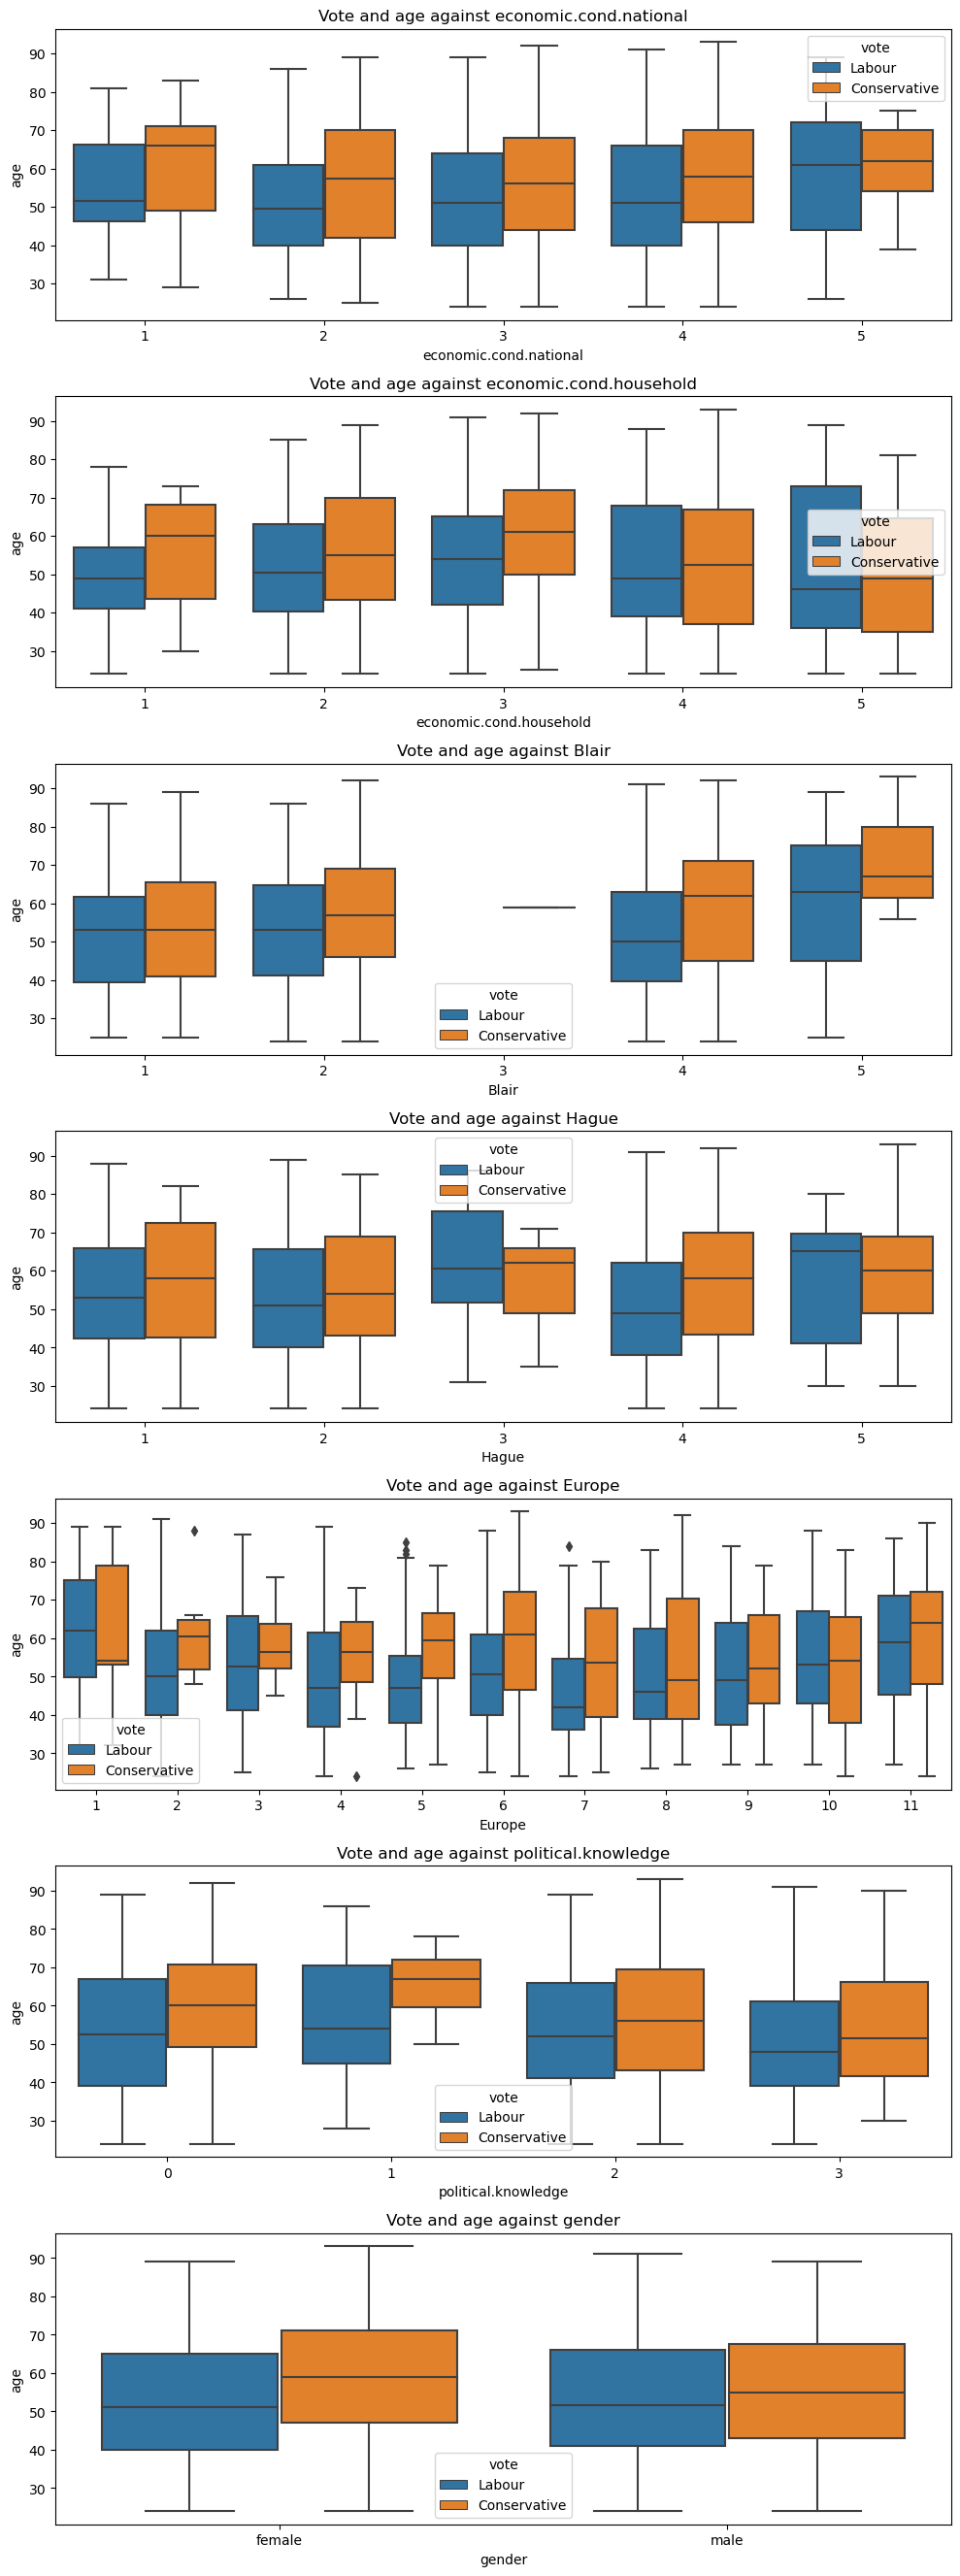

In [231]:
cat_columns = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
plt.figure(figsize = (10,30))
for i in range(len(cat_columns)):
    plt.subplot(8, 1, i+1)
    plt.title('Vote and age against ' + cat_columns[i])
    sns.boxplot(x = cat_columns[i], y = 'age', hue = 'vote', data = election_df);
    plt.tight_layout()


In [232]:
#multivariate analysis

pd.crosstab(election_df.gender, election_df['political.knowledge'], margins = True, values=election_df.vote, aggfunc='count', normalize = True)

political.knowledge,0,1,2,3,All
gender,,,,,
female,0.185234,0.015162,0.276203,0.056032,0.53263
male,0.114041,0.009888,0.235333,0.108108,0.46737
All,0.299275,0.025049,0.511536,0.164140,1.00000


In [233]:
pd.crosstab(election_df.gender, election_df['economic.cond.national'], margins = True, values=election_df.vote, aggfunc='count', normalize = True)

economic.cond.national,1,2,3,4,5,All
gender,,,,,,
female,0.015162,0.090969,0.223467,0.178642,0.024390,0.53263
male,0.009229,0.077785,0.174687,0.176005,0.029664,0.46737
All,0.024390,0.168754,0.398154,0.354647,0.054054,1.00000


In [234]:
pd.crosstab(election_df.gender, election_df['economic.cond.household'], margins = True, values=election_df.vote, aggfunc='count', normalize = True)

economic.cond.household,1,2,3,4,5,All
gender,,,,,,
female,0.024390,0.100857,0.229400,0.148319,0.029664,0.53263
male,0.018457,0.083718,0.195781,0.138431,0.030982,0.46737
All,0.042848,0.184575,0.425181,0.286750,0.060646,1.00000


In [235]:
pd.crosstab(election_df.gender, election_df['Blair'], margins = True, values=election_df.vote, aggfunc='count', normalize = True)

Blair,1,2,3,4,5,All
gender,,,,,,
female,0.034278,0.168095,0.000000,0.284773,0.045485,0.53263
male,0.029664,0.117996,0.000659,0.264338,0.054713,0.46737
All,0.063942,0.286091,0.000659,0.549110,0.100198,1.00000


In [236]:
pd.crosstab(election_df.gender, election_df['Hague'], margins = True, values=election_df.vote, aggfunc='count', normalize = True)

Hague,1,2,3,4,5,All
gender,,,,,,
female,0.073830,0.216875,0.015821,0.203691,0.022413,0.53263
male,0.079763,0.189848,0.008570,0.163481,0.025709,0.46737
All,0.153593,0.406724,0.024390,0.367172,0.048121,1.00000


1.3

Encode the data (having string values) for Modelling. 

Is Scaling necessary here or not? The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling.

Data Split: Split the data into train and test (70:30). Data split, ratio defined for the split, train-test split should be discussed

Object data should be converted into categorical/numerical data to fit in the models.

In [25]:
#encoding the only categorical column in the dataset i.e., Gender
election_df_encoded = pd.get_dummies(data = election_df, columns = ['gender'], drop_first = True)

In [26]:
#encoding target variable to be able to interpret probailities better.
#making 'Labour' variable as 1 and 'Conservative' as 0

election_df_encoded['vote'] = np.where(election_df_encoded['vote'] == 'Labour', 1, 0)

In [27]:
election_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   int32   
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   category
 3   economic.cond.household  1517 non-null   category
 4   Blair                    1517 non-null   category
 5   Hague                    1517 non-null   category
 6   Europe                   1517 non-null   category
 7   political.knowledge      1517 non-null   category
 8   gender_male              1517 non-null   uint8   
dtypes: category(6), int32(1), int64(1), uint8(1)
memory usage: 41.4 KB


In [28]:
election_df_encoded.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [29]:
election_df_encoded.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1520,0,67,5,3,2,4,11,3,1
1521,0,73,2,2,4,4,8,2,1
1522,1,37,3,3,5,4,2,2,1
1523,0,61,3,3,1,4,11,2,1
1524,0,74,2,3,2,4,11,0,0


In [30]:
# scaling not necessary here. All are categorical variables. no multiple numeric variables with wide ranges to consider scaling in this scenario.

In [31]:
X = election_df_encoded.drop(['vote'], axis = 1)

In [32]:
y = election_df_encoded['vote']

In [33]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int32

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 1)

In [36]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
533,71,3,3,4,2,11,0,0
708,57,4,5,4,1,3,2,0
1144,24,3,4,2,4,11,0,1
1081,43,4,4,2,3,5,0,1
957,37,3,2,4,2,7,2,1


In [37]:
y_train.head()

533     1
708     1
1144    0
1081    1
957     1
Name: vote, dtype: int32

In [38]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
274,71,2,3,4,2,11,0,0
767,31,2,2,2,4,5,2,1
416,35,4,3,2,1,7,2,1
1033,34,4,4,4,2,7,0,0
507,40,3,4,4,2,7,3,1


In [39]:
y_test.head()

274     1
767     0
416     1
1033    1
507     1
Name: vote, dtype: int32

#1.4

Apply Logistic Regression and LDA (Linear Discriminant Analysis).

Interpret the inferences of both model s (2 pts).

Successful implementation of each model.

Logical reason should be shared if any custom changes are made to the parameters while building the model.

Calculate Train and Test Accuracies for each model.

Comment on the validness of models (over fitting or under fitting)

In [40]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
log_reg_model.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression()>

In [42]:
log_reg_model.score(X_train, y_train)

0.8284637134778511

In [43]:
log_reg_model.score(X_test, y_test)

0.8552631578947368

In [44]:
y_train_predict = log_reg_model.predict(X_train)
y_test_predict = log_reg_model.predict(X_test)

In [45]:
y_train_predict_proba = pd.DataFrame(log_reg_model.predict_proba(X_train))
y_test_predict_proba = pd.DataFrame(log_reg_model.predict_proba(X_test))

In [46]:
print('Predicted probabilities on training data')
y_train_predict_proba.head()

Predicted probabilities on training data


,0,1
0,0.150993,0.849007
1,0.017387,0.982613
2,0.592611,0.407389
3,0.139744,0.860256
4,0.097939,0.902061


In [47]:
print('Predicted probabilities on test data')
y_test_predict_proba.head()

Predicted probabilities on test data


,0,1
0,0.200709,0.799291
1,0.608258,0.391742
2,0.084904,0.915096
3,0.031386,0.968614
4,0.136642,0.863358


In [48]:
#Building model using LDA

In [49]:
lda_model = LinearDiscriminantAnalysis()

In [50]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [51]:
np.round(lda_model.coef_, 2)

array([[-0.02,  0.36,  0.03,  0.69, -0.97, -0.22, -0.48,  0.02]])

In [52]:
lda_model.intercept_

array([3.6784368])

In [53]:
y_train_predicted = lda_model.predict(X_train)

y_test_predicted = lda_model.predict(X_test)

In [54]:
y_train_predicted_prob = lda_model.predict_proba(X_train)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.120975,0.879025
1,0.011715,0.988285
2,0.616409,0.383591
3,0.134288,0.865712
4,0.077054,0.922946


In [55]:
y_test_predicted_prob = lda_model.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.165344,0.834656
1,0.658755,0.341245
2,0.075012,0.924988
3,0.019620,0.980380
4,0.118369,0.881631


In [56]:
#Accuracy of model on training data
print('Accuracy of LDA model on training data:', lda_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of LDA model on test data:', lda_model.score(X_test, y_test))

Accuracy of LDA model on training data: 0.822808671065033
Accuracy of LDA model on test data: 0.8530701754385965


#1.5

Apply KNN Model and Naïve Bayes Model.

Interpret the inferences of each model.

Successful implementation of each model.

Logical reason should be shared if any custom changes are made to the parameters while building the model. 

Calculate Train and Test Accuracies for each model. 

Comment on the validness of models (over fitting or under fitting)

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [58]:
NB_model = GaussianNB()

In [59]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [60]:
#Accuracy of model on training data
print('Accuracy of Gaussian Naive Bayes model on training data:', NB_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of Gaussian Naive Bayes model on test data:', NB_model.score(X_test, y_test))

Accuracy of Gaussian Naive Bayes model on training data: 0.8199811498586239
Accuracy of Gaussian Naive Bayes model on test data: 0.8574561403508771


In [61]:
y_train_predicted = NB_model.predict(X_train)
y_test_predicted = NB_model.predict(X_test)

In [62]:
#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


Classification report for training data:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061

Classification report for test data:

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



[[226  96]
 [ 95 644]]


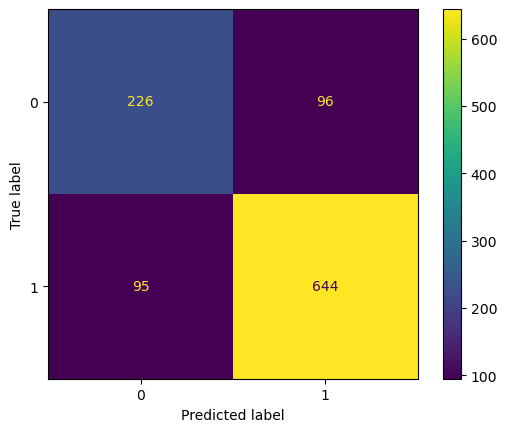

In [63]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train, y_train_predicted))


print(metrics.plot_confusion_matrix(NB_model, X_train, y_train));

[[226  96]
 [ 95 644]]


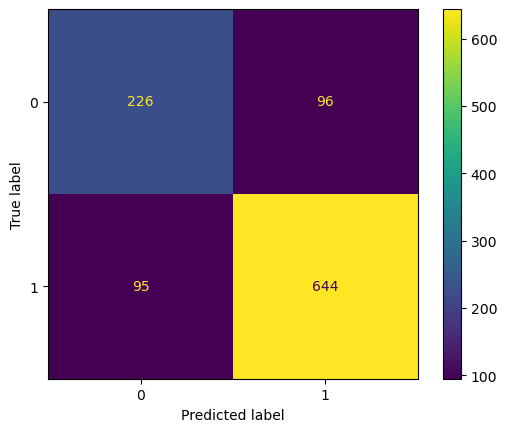

In [64]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train, y_train_predicted))


print(metrics.plot_confusion_matrix(NB_model, X_train, y_train));

In [187]:
# we will apply SMOTE and some hyperparameters to improve the accuracy than the basic Naive Bayes classifier.
#Applying SMOTE on training dataset:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

print('Shape of original dataset',X_train.shape)

## Let's check the shape after SMOTE
print('Shape of SMOTE sampled dataset', X_train_smote.shape)

Shape of original dataset (1061, 8)
Shape of SMOTE sampled dataset (1478, 8)


In [188]:
NB_model = GaussianNB(var_smoothing = 0.0000000001)

In [189]:
NB_model.fit(X_train_smote, y_train_smote)

GaussianNB(var_smoothing=1e-10)

In [190]:
#Accuracy of model on training data
print('Accuracy of SMOTE Gaussian Naive Bayes model on training data:', NB_model.score(X_train_smote, y_train_smote))

#Accuracy of model on test data
print('Accuracy of SMOTEGaussian Naive Bayes model on test data:', NB_model.score(X_test, y_test))

Accuracy of SMOTE Gaussian Naive Bayes model on training data: 0.8105548037889039
Accuracy of SMOTEGaussian Naive Bayes model on test data: 0.8223684210526315


In [65]:
#KNN model

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier()

#n_neighbors = {3,7}
#leaf_size = {20,40}
#weights : {'uniform', 'distance'} 
#p = {0,1,2}

In [68]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
#Accuracy of model on training data
print('Accuracy of KNN model on training data:', knn_model.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of KNN model on test data:', knn_model.score(X_test, y_test))

Accuracy of KNN model on training data: 0.8491988689915174
Accuracy of KNN model on test data: 0.8070175438596491


In [70]:
y_train_predicted = knn_model.predict(X_train)
y_test_predicted = knn_model.predict(X_test)

In [71]:
#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


Classification report for training data:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061

Classification report for test data:

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       138
           1       0.85      0.88      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



[[229  93]
 [ 67 672]]


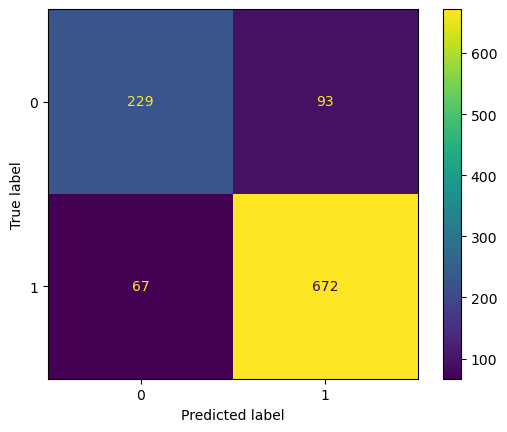

In [72]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train, y_train_predicted))


print(metrics.plot_confusion_matrix(knn_model, X_train, y_train));

[[ 88  50]
 [ 38 280]]


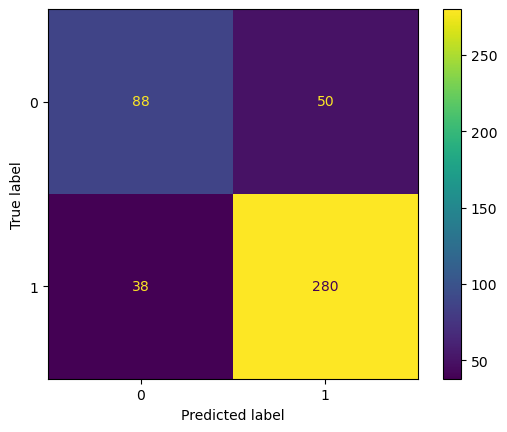

In [73]:
#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(knn_model, X_test, y_test));

In [193]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 7, leaf_size = 30, p = 1)

#n_neighbors = {3,7}
#leaf_size = {20,40}
#weights : {'uniform', 'distance'} 
#p = {0,1,2}

knn_model_2.fit(X_train, y_train)

#Accuracy of model on training data
print('Accuracy of KNN model on training data:', knn_model_2.score(X_train, y_train))

#Accuracy of model on test data
print('Accuracy of KNN model on test data:', knn_model_2.score(X_test, y_test))

Accuracy of KNN model on training data: 0.8369462770970783
Accuracy of KNN model on test data: 0.8267543859649122


1.6

Model Tuning (4 pts) , 

Bagging ( 1.5 pts)

Boosting (1.5 pts). 

Apply grid search on each model (include all models). make models on best_params. 

Compare and comment on performances of all. 

Comment on feature importance if applicable. 

Successful implementation of both algorithms along with inferences and comments on the model performances.

In [74]:
#we have around 1000 and 400 data points in each class which leads to bias. hence applying smote only on the training data

In [75]:
#pip install imbalanced-learn

In [194]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Shape of original dataset',X_train.shape)

## Let's check the shape after SMOTE
print('Shape of SMOTE sampled dataset', X_train_res.shape)

Shape of original dataset (1061, 8)
Shape of SMOTE sampled dataset (1478, 8)


In [195]:
print('Value counts of target variable before applying SMOTE\n', y_train.value_counts())

print('Value counts of target variable after applying SMOTE\n', pd.DataFrame(y_train_res).value_counts())

Value counts of target variable before applying SMOTE
 1    739
0    322
Name: vote, dtype: int64
Value counts of target variable after applying SMOTE
 0    739
1    739
dtype: int64


In [196]:
#model tuning on logistic regression

In [197]:
params = {'penalty':['l2','none'],
         'solver':['lfgbs','newton-cg']}

In [198]:
model = LogisticRegression(n_jobs=-1)

In [199]:
grid_search = GridSearchCV(estimator=model,param_grid=params, cv = 3 , n_jobs=-1,scoring='f1')

In [200]:
grid_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['lfgbs', 'newton-cg']},
             scoring='f1')

In [201]:
log_reg_model = grid_search.best_estimator_ #best model coming from best_estimator

In [202]:
log_reg_model.fit(X_train_res, y_train_res)

LogisticRegression(n_jobs=-1, solver='newton-cg')

In [203]:
log_reg_model.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(n_jobs=-1, solver='newton-cg')>

In [204]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = log_reg_model.predict(X_train_res)
y_test_predicted = log_reg_model.predict(X_test)

In [205]:
#building probability matrix on training data
y_train_predicted_prob = log_reg_model.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.325460,0.674540
1,0.027802,0.972198
2,0.705076,0.294924
3,0.201693,0.798307
4,0.188945,0.811055


In [206]:
#building probability matrix on test data
y_test_predicted_prob = log_reg_model.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.452695,0.547305
1,0.815016,0.184984
2,0.131809,0.868191
3,0.066417,0.933583
4,0.170449,0.829551


In [207]:
#Accuracy of model on training data
print('Accuracy of grid search logistic regression on training data:', log_reg_model.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search logisitic regression on test data:', log_reg_model.score(X_test, y_test))

Accuracy of grid search logistic regression on training data: 0.8179972936400541
Accuracy of grid search logisitic regression on test data: 0.8289473684210527


In [208]:
#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


Classification report for training data:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       739
           1       0.82      0.81      0.82       739

    accuracy                           0.82      1478
   macro avg       0.82      0.82      0.82      1478
weighted avg       0.82      0.82      0.82      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.91      0.83      0.87       318

    accuracy                           0.83       456
   macro avg       0.80      0.83      0.81       456
weighted avg       0.84      0.83      0.83       456



[[608 131]
 [138 601]]


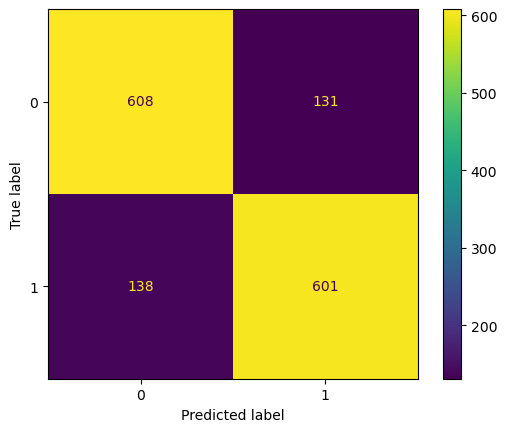

In [209]:
#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(log_reg_model, X_train_res, y_train_res));

[[113  25]
 [ 53 265]]


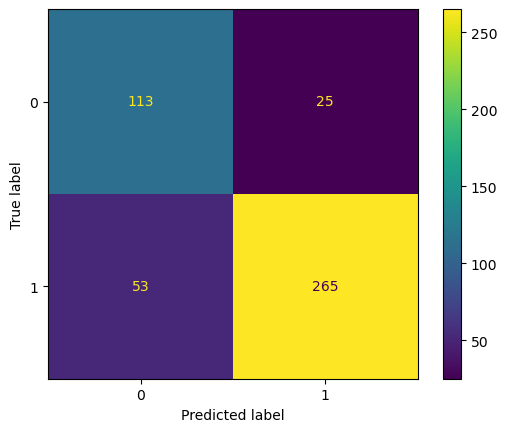

In [210]:
#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(log_reg_model, X_test, y_test))

AUC ROC score on training data: 0.8838233651516787


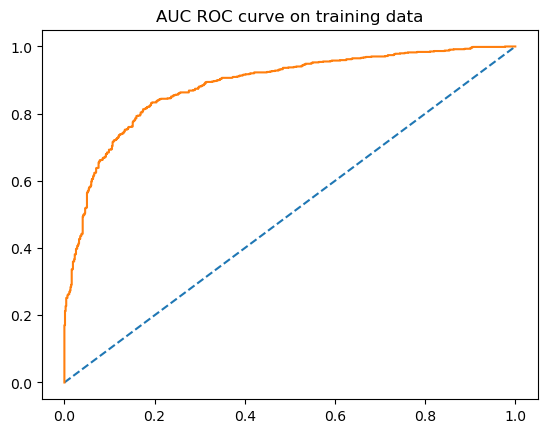

In [211]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.9173730744690549


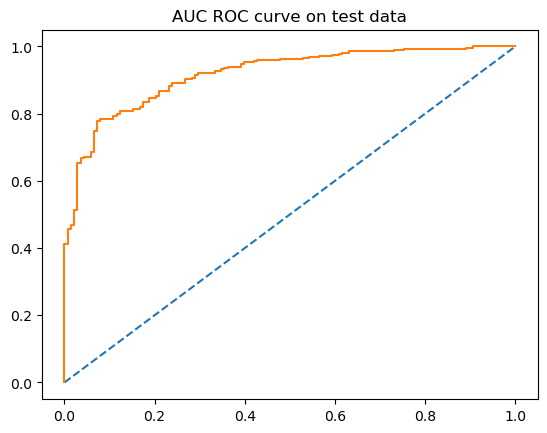

In [212]:
#ROC curve on test data
#ROC_AOC curve on test data

#ROC curve on training data
#ROC_AUC score on training data

#y_test_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [95]:
#model tuning on Naive Bayes using GridSearchCV

In [220]:
params = {'var_smoothing':[0.000001, 0.00001, 0.0001, 0.001, 0.1, 0]}

model = GaussianNB()

grid_search = GridSearchCV(estimator=model,param_grid=params, cv = 3 , n_jobs=-1,scoring='f1')
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-06, 1e-05, 0.0001, 0.001, 0.1,
                                           0]},
             scoring='f1')

In [221]:
grid_search_gnb_best = grid_search.best_estimator_ #best model coming from best_estimator

grid_search_gnb_best.fit(X_train_res, y_train_res)

GaussianNB(var_smoothing=1e-06)

In [222]:
#building predictions
y_train_predicted = grid_search_gnb_best.predict(X_train_res)
y_test_predicted = grid_search_gnb_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_gnb_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.257779,0.742221
1,0.000639,0.999361
2,0.741480,0.258520
3,0.093819,0.906181
4,0.166284,0.833716


In [223]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_gnb_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)
y_test_df.head()

,0,1
0,0.469918,0.530082
1,0.939686,0.060314
2,0.042273,0.957727
3,0.014984,0.985016
4,0.040934,0.959066


Accuracy of grid search naive bayes on training data: 0.8105548037889039
Accuracy of grid search naive bayes on test data: 0.8223684210526315
Classification report for training data:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       739
           1       0.80      0.82      0.81       739

    accuracy                           0.81      1478
   macro avg       0.81      0.81      0.81      1478
weighted avg       0.81      0.81      0.81      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       138
           1       0.90      0.83      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.83      0.82      0.83       456

[[590 149]
 [131 608]]
[[110  28]
 [ 53 265]]


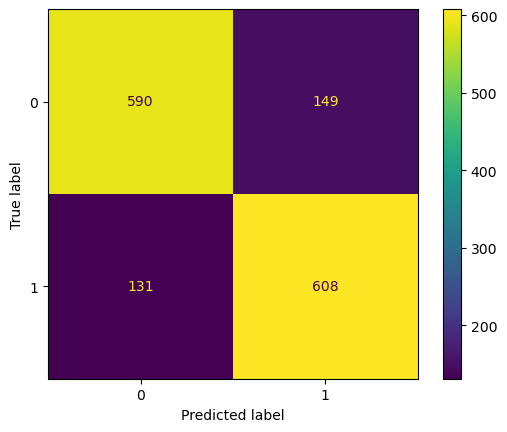

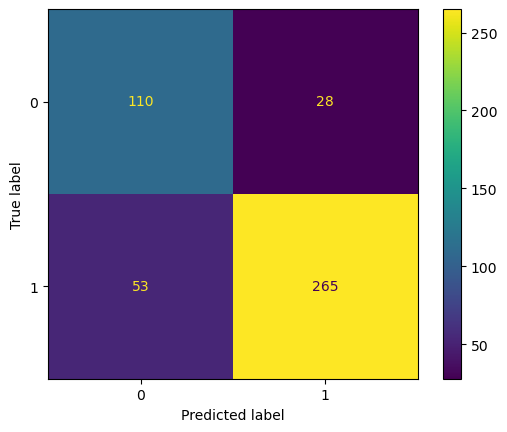

In [224]:
#prediciting traing data and test data using the model built.

#Accuracy of model on training data
print('Accuracy of grid search naive bayes on training data:', grid_search_gnb_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search naive bayes on test data:', grid_search_gnb_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_gnb_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_gnb_best, X_test, y_test))

AUC ROC score on training data: 0.8854621961067236


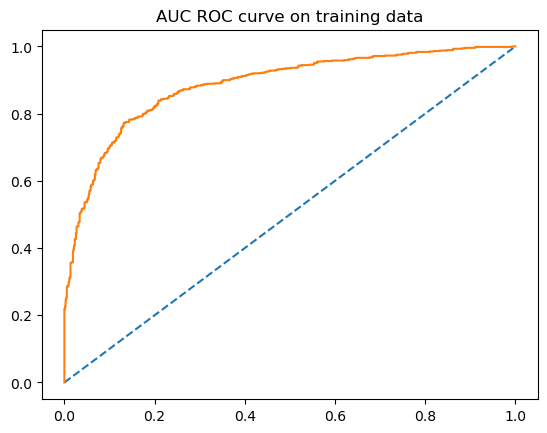

In [218]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.9108558928083129


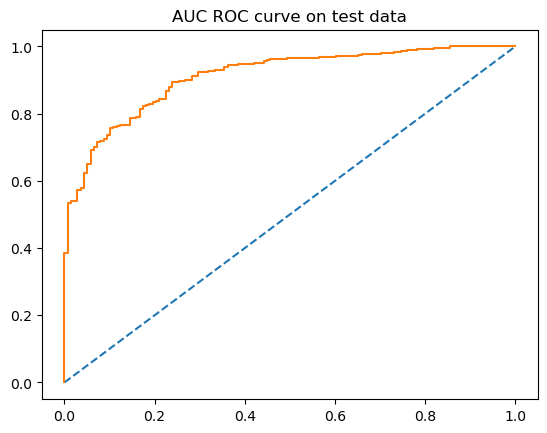

In [219]:
#ROC curve on training data
#ROC_AUC score on training data

#y_test_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [103]:
#model tuning on KNN using GridSearchCV

In [104]:
params = {'n_neighbors':[3,4,5,6,7], 'leaf_size':np.arange(20,41), 'weights':['uniform', 'distance'], 'p': [0,1,2]}

In [105]:
grid_search_knn = GridSearchCV(estimator = knn_model, param_grid = params, cv = 3, n_jobs = -1)

In [106]:
grid_search_knn.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40]),
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [0, 1, 2],
                         'weights': ['uniform', 'distance']})

In [107]:
grid_search_knn_best = grid_search_knn.best_estimator_

In [259]:
grid_search_knn_best.fit(X_train_res, y_train_res)

KNeighborsClassifier(leaf_size=20, n_neighbors=3, p=1, weights='distance')

In [109]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = grid_search_knn_best.predict(X_train_res)
y_test_predicted = grid_search_knn_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_knn_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [110]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_knn_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.117647,0.882353
1,1.000000,0.000000
2,0.642857,0.357143
3,0.000000,1.000000
4,0.000000,1.000000


Accuracy of grid search KNN algorithm on training data: 0.9993234100135318
Accuracy of grid search KNN algorithm on test data: 0.7850877192982456
Classification report for training data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.62      0.77      0.68       138
           1       0.89      0.79      0.84       318

    accuracy                           0.79       456
   macro avg       0.75      0.78      0.76       456
weighted avg       0.81      0.79      0.79       456

[[739   0]
 [  1 738]]
[[106  32]
 [ 66 252]]


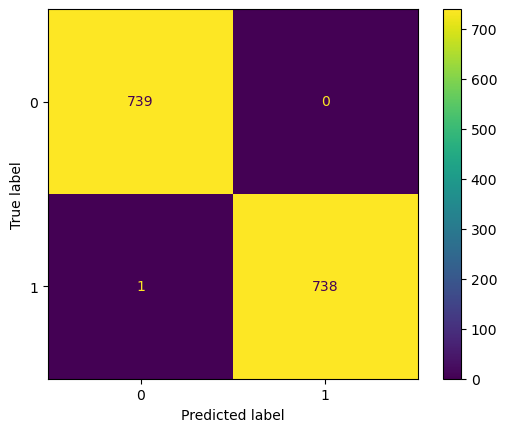

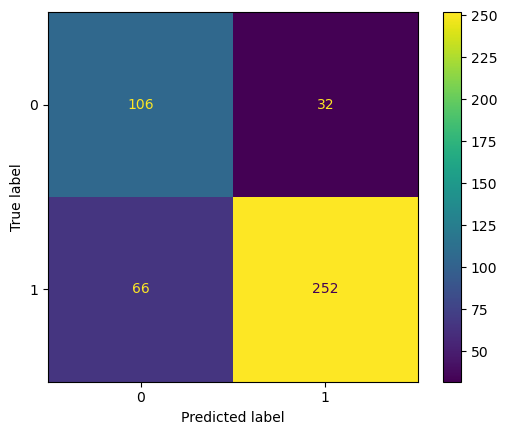

In [111]:
#Accuracy of model on training data
print('Accuracy of grid search KNN algorithm on training data:', grid_search_knn_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search KNN algorithm on test data:', grid_search_knn_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_knn_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_knn_best, X_test, y_test))

AUC ROC score on training data: 0.9999990844519805


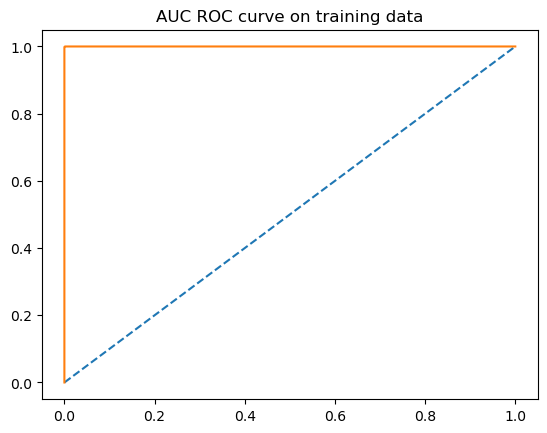

In [112]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.829299972655182


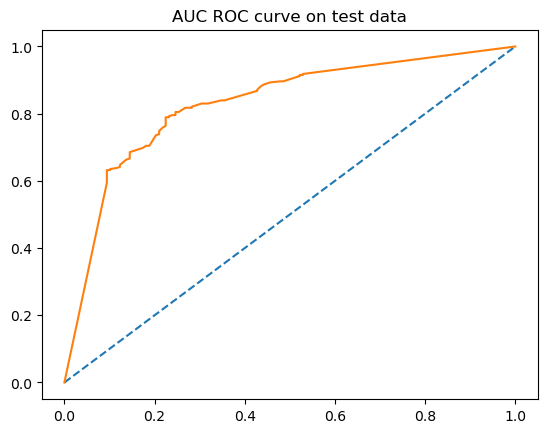

In [113]:
#y_test_predicted_prob
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [280]:
#bagging - using Bagging classifier and grid search CV

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_estimator = cart, random_state=1)

params = {'n_estimators' : [50, 60, 70, 80, 90, 100],
         'max_samples': [1, 5, 10, 15, 20],
         'max_features': [1, 10, 20, 30]}

grid_search_bc = GridSearchCV(estimator = bagging_model, param_grid = params, cv = 3, n_jobs = -1)

grid_search_bc.fit(X_train_res, y_train_res)

grid_search_bc_best = grid_search_bc.best_estimator_

grid_search_bc_best.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=15, n_estimators=80, random_state=1)

In [281]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = grid_search_bc_best.predict(X_train_res)
y_test_predicted = grid_search_bc_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_bc_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.417094,0.582906
1,0.334554,0.665446
2,0.502055,0.497945
3,0.416163,0.583837
4,0.425413,0.574587


In [282]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_bc_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.470770,0.529230
1,0.561324,0.438676
2,0.393938,0.606062
3,0.336669,0.663331
4,0.364727,0.635273


Accuracy of grid search bagging classifier on training data: 0.7706359945872802
Accuracy of grid search bagging classifier on test data: 0.8267543859649122
Classification report for training data:

              precision    recall  f1-score   support

           0       0.87      0.64      0.74       739
           1       0.71      0.90      0.80       739

    accuracy                           0.77      1478
   macro avg       0.79      0.77      0.77      1478
weighted avg       0.79      0.77      0.77      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       138
           1       0.85      0.91      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.82      0.83      0.82       456

[[472 267]
 [ 72 667]]
[[ 87  51]
 [ 28 290]]


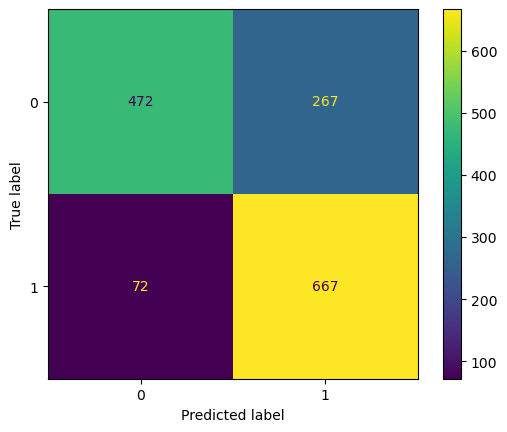

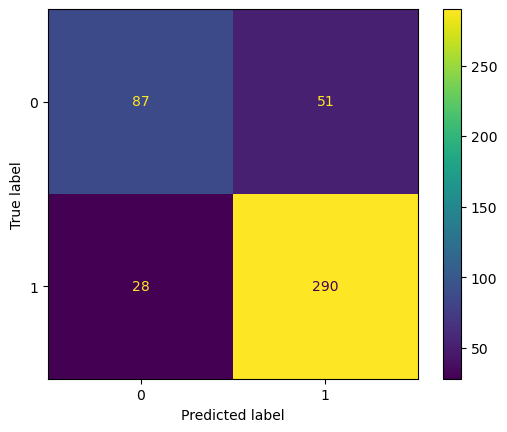

In [283]:
#Accuracy of model on training data
print('Accuracy of grid search bagging classifier on training data:', grid_search_bc_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search bagging classifier on test data:', grid_search_bc_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_bc_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_bc_best, X_test, y_test))

AUC ROC score on training data: 0.8712849350235571


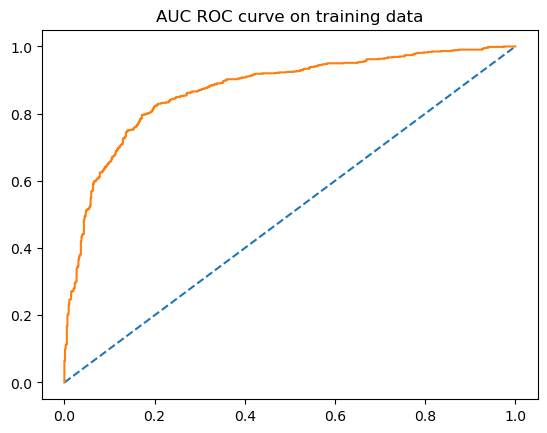

In [284]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.8964998632759094


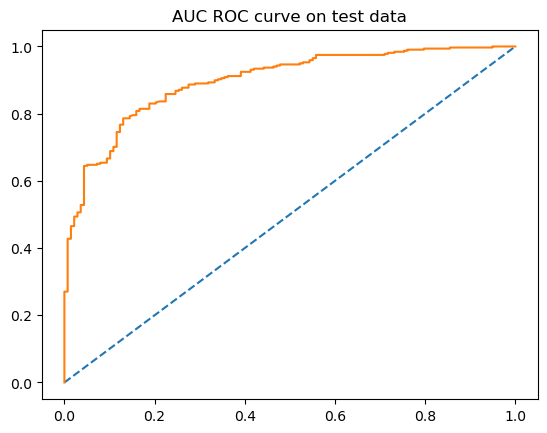

In [285]:
#y_test_predicted_prob
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [286]:
#bagging - using Random Forest Classifier and grid search CV

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators' : [50, 60, 70, 80, 90, 100],
         'min_samples_split' : [10, 20, 30],
         'min_samples_leaf' : [10, 20, 30]}

grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = params, cv = 3, n_jobs = -1)

grid_search_rfc.fit(X_train_res, y_train_res)

grid_search_rfc_best = grid_search_rfc.best_estimator_
grid_search_rfc_best.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=30,
                       n_estimators=50, random_state=1)

In [287]:
v_imp = pd.DataFrame(grid_search_rfc_best.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False)
v_imp.head()

,Importance
Hague,0.276903
Blair,0.227173
Europe,0.189383
economic.cond.national,0.100483
political.knowledge,0.072037


In [288]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = grid_search_rfc_best.predict(X_train_res)
y_test_predicted = grid_search_rfc_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_rfc_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.244609,0.755391
1,0.037900,0.962100
2,0.681410,0.318590
3,0.406255,0.593745
4,0.297662,0.702338


In [289]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_rfc_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.488292,0.511708
1,0.681126,0.318874
2,0.360444,0.639556
3,0.123968,0.876032
4,0.287250,0.712750


Accuracy of grid search bagging classifier on training data: 0.857916102841678
Accuracy of grid search bagging classifier on test data: 0.8486842105263158
Classification report for training data:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       739
           1       0.86      0.85      0.86       739

    accuracy                           0.86      1478
   macro avg       0.86      0.86      0.86      1478
weighted avg       0.86      0.86      0.86      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       138
           1       0.91      0.86      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.84      0.83       456
weighted avg       0.86      0.85      0.85       456

[[639 100]
 [110 629]]
[[112  26]
 [ 43 275]]


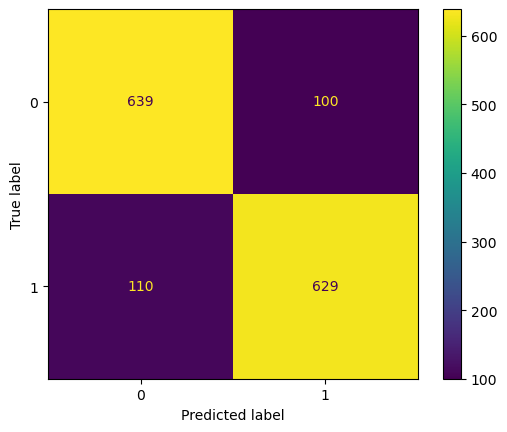

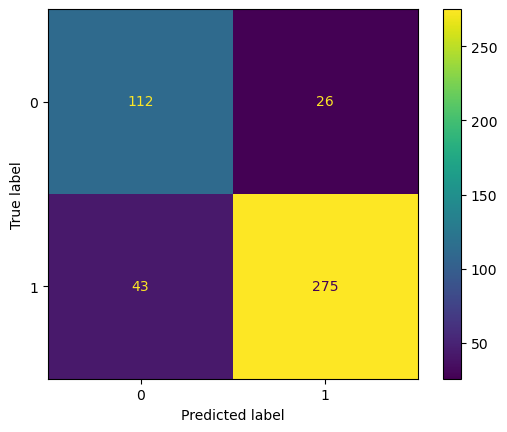

In [290]:
#Accuracy of model on training data
print('Accuracy of grid search bagging classifier on training data:', grid_search_rfc_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search bagging classifier on test data:', grid_search_rfc_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_rfc_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_rfc_best, X_test, y_test))

AUC ROC score on training data: 0.9344907081031493


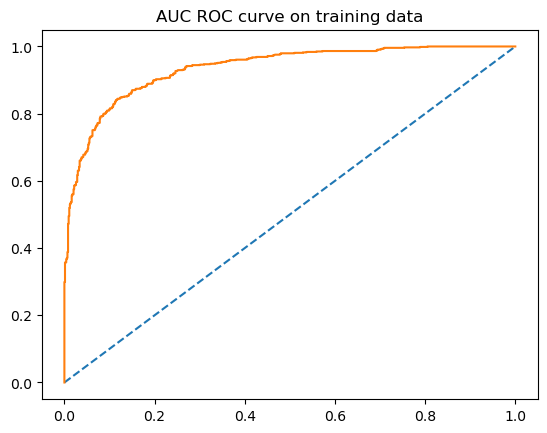

In [291]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.9198113207547169


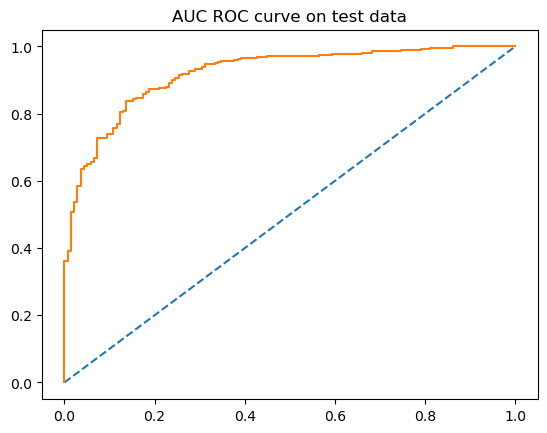

In [292]:
#y_test_predicted_prob
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [126]:
#Boosting!!

In [293]:
#Using Adaboost
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state = 1)

params = {'n_estimators' : [50, 60, 70, 80, 90, 100]}

grid_search_adaboost = GridSearchCV(estimator = abc, param_grid = params, cv = 3, n_jobs = -1)

grid_search_adaboost.fit(X_train_res, y_train_res)

grid_search_abc_best = grid_search_adaboost.best_estimator_
grid_search_abc_best.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=90, random_state=1)

In [263]:
v_imp = pd.DataFrame(grid_search_abc_best.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False)

In [264]:
v_imp.head()

,Importance
age,0.477778
Blair,0.188889
Europe,0.122222
Hague,0.077778
economic.cond.national,0.055556


In [294]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = grid_search_abc_best.predict(X_train_res)
y_test_predicted = grid_search_abc_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_abc_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.497451,0.502549
1,0.488575,0.511425
2,0.508471,0.491529
3,0.497481,0.502519
4,0.498095,0.501905


In [295]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_abc_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.499355,0.500645
1,0.504873,0.495127
2,0.495885,0.504115
3,0.493122,0.506878
4,0.493689,0.506311


Accuracy of grid search bagging classifier on training data: 0.8423545331529093
Accuracy of grid search bagging classifier on test data: 0.8333333333333334
Classification report for training data:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       739
           1       0.85      0.83      0.84       739

    accuracy                           0.84      1478
   macro avg       0.84      0.84      0.84      1478
weighted avg       0.84      0.84      0.84      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       138
           1       0.90      0.85      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.84      0.83      0.84       456

[[635 104]
 [129 610]]
[[109  29]
 [ 47 271]]


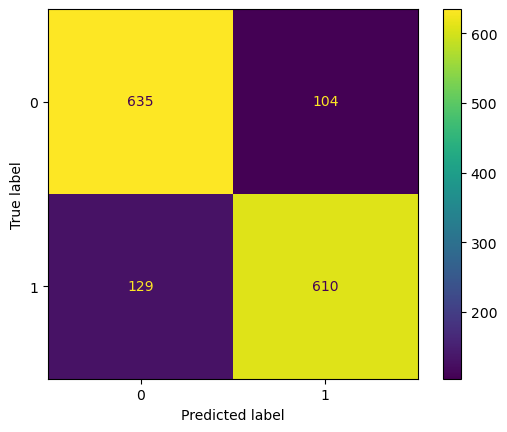

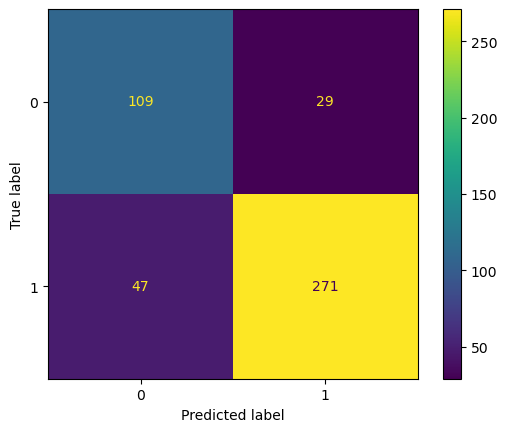

In [296]:
#Accuracy of model on training data
print('Accuracy of grid search bagging classifier on training data:', grid_search_abc_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search bagging classifier on test data:', grid_search_abc_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_abc_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_abc_best, X_test, y_test))

AUC ROC score on training data: 0.9162227784685079


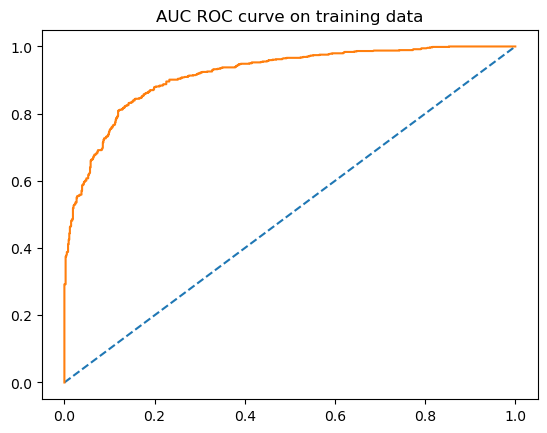

In [297]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.9052502050861362


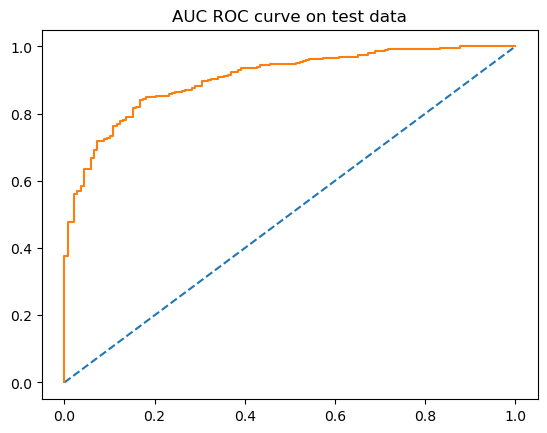

In [298]:
#y_test_predicted_prob
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

In [299]:
#using gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)

params = {'n_estimators' : [50, 60, 70, 80, 90, 100]}

grid_search_gbcl = GridSearchCV(estimator = gbcl, param_grid  = params, cv = 3, n_jobs = -1)
grid_search_gbcl.fit(X_train_res, y_train_res)

grid_search_gbcl_best = grid_search_gbcl.best_estimator_
grid_search_gbcl_best.fit(X_train_res, y_train_res)

GradientBoostingClassifier(n_estimators=70, random_state=1)

In [300]:
v_imp = pd.DataFrame(grid_search_gbcl_best.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False)
v_imp.head()

,Importance
Hague,0.396390
Blair,0.226983
Europe,0.120669
political.knowledge,0.090734
economic.cond.national,0.070536


In [301]:
#prediciting traing data and test data using the model built.

#building predictions
y_train_predicted = grid_search_gbcl_best.predict(X_train_res)
y_test_predicted = grid_search_gbcl_best.predict(X_test)

#building probability matrix on training data
y_train_predicted_prob = grid_search_gbcl_best.predict_proba(X_train_res)
y_train_df = pd.DataFrame(y_train_predicted_prob)

y_train_df.head()

,0,1
0,0.196801,0.803199
1,0.030704,0.969296
2,0.849203,0.150797
3,0.378116,0.621884
4,0.302946,0.697054


In [135]:
#building probability matrix on test data
y_test_predicted_prob = grid_search_gbcl_best.predict_proba(X_test)
y_test_df = pd.DataFrame(y_test_predicted_prob)

y_test_df.head()

,0,1
0,0.546872,0.453128
1,0.770689,0.229311
2,0.084839,0.915161
3,0.055609,0.944391
4,0.258552,0.741448


Accuracy of grid search bagging classifier on training data: 0.8775372124492558
Accuracy of grid search bagging classifier on test data: 0.8267543859649122
Classification report for training data:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       739
           1       0.89      0.86      0.88       739

    accuracy                           0.88      1478
   macro avg       0.88      0.88      0.88      1478
weighted avg       0.88      0.88      0.88      1478

Classification report for test data:

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       138
           1       0.91      0.84      0.87       318

    accuracy                           0.83       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.84      0.83      0.83       456

[[661  78]
 [103 636]]
[[111  27]
 [ 52 266]]


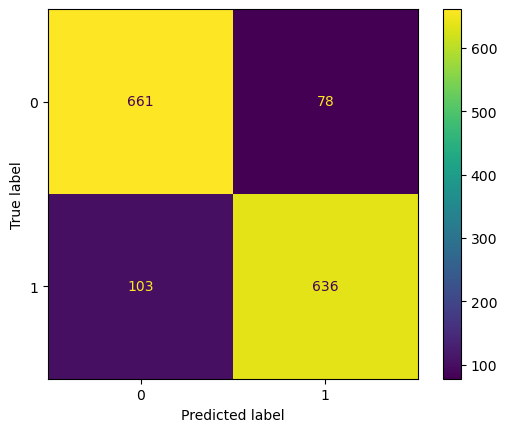

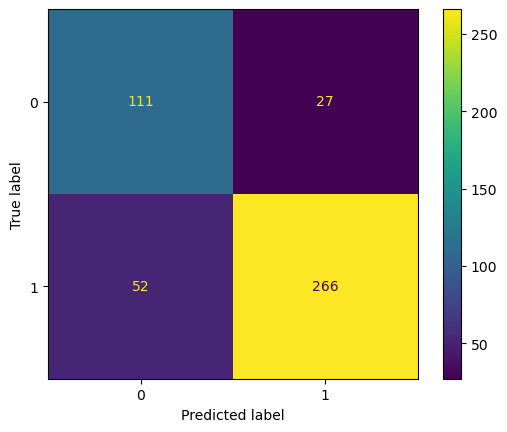

In [136]:
#Accuracy of model on training data
print('Accuracy of grid search bagging classifier on training data:', grid_search_gbcl_best.score(X_train_res, y_train_res))

#Accuracy of model on test data
print('Accuracy of grid search bagging classifier on test data:', grid_search_gbcl_best.score(X_test, y_test))

#Classification report on training data

print('Classification report for training data:\n')
print(metrics.classification_report(y_train_res, y_train_predicted))

#Classification report on test data
print('Classification report for test data:\n')
print(metrics.classification_report(y_test, y_test_predicted))


#confusion matrix for training data
print(metrics.confusion_matrix(y_train_res, y_train_predicted))


print(metrics.plot_confusion_matrix(grid_search_gbcl_best, X_train_res, y_train_res));

#confusion matrix for test data
print(metrics.confusion_matrix(y_test, y_test_predicted))


print(metrics.plot_confusion_matrix(grid_search_gbcl_best, X_test, y_test))

AUC ROC score on training data: 0.9436416105588321


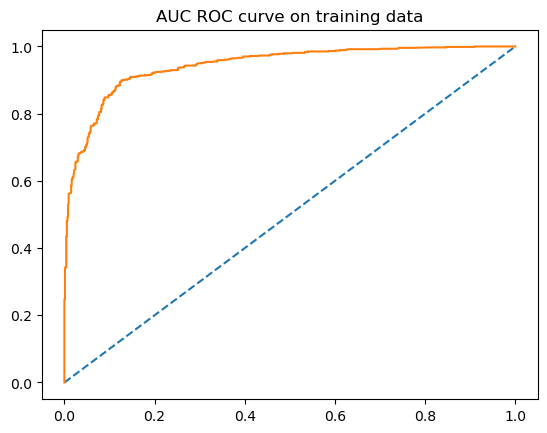

In [137]:
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
y_train_predicted_prob1 = y_train_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_train_res, y_train_predicted_prob1)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(y_train_res, y_train_predicted_prob1)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.9089189681888615


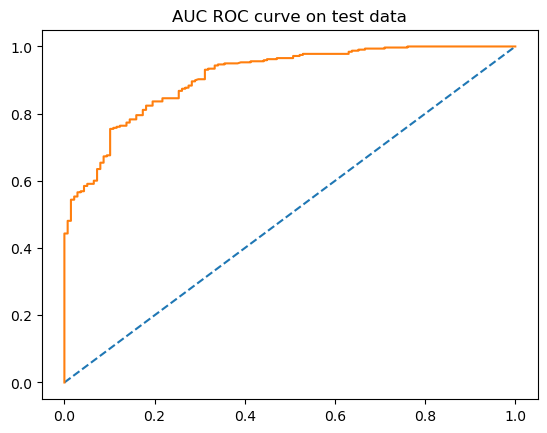

In [138]:
#y_test_predicted_prob
# keep probabilities for the positive outcome only
y_test_predicted_prob1 = y_test_predicted_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predicted_prob1)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
test_fpr, test_tpr , _ = metrics.roc_curve(y_test, y_test_predicted_prob1)

# plot the roc curve for the model
plt.plot(test_fpr,test_tpr);

1.7

Performance Metrics: Check the performance of Predictions on Train and Test sets using 
    
    Accuracy
    
    Confusion Matrix
    
    Plot ROC curve and get ROC_AUC score for each model
    
    classification report (4 pts) 
    
Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. 

Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

#list accuracies of all models

1. log_reg - grid search

3. nb

4. knn

5. bagging

6. random forest

7. adaboost

8. gradient boosting

In [139]:
#list confusion matrices of above 8 models

In [140]:
# list auc scores and auc roc scores of above 8 models

In [141]:
# list classification reports of all above models.

In [142]:
# table of accuracies, precisions, recalls of all models

In [143]:
#comment and describe on best model

In [144]:
# all  performance metrics have been listed in above question

In [145]:
v_imp = pd.DataFrame(grid_search_rfc_best.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending=False)

In [146]:
v_imp.head(10)

,Importance
Hague,0.285690
Blair,0.214209
Europe,0.190143
economic.cond.national,0.103640
political.knowledge,0.071113
age,0.062873
economic.cond.household,0.058003
gender_male,0.014330


### Problem 2

In [147]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [148]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [149]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [150]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [151]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

2.1

Find the number of characters, words and sentences for the mentioned documents.

(Hint: use .words(), .raw(), .sent() for extracting counts)

In [152]:
# no.of characters

#number of words
char_count1 = len(inaugural.raw('1941-Roosevelt.txt'))
char_count2 = len(inaugural.raw('1961-Kennedy.txt'))
char_count3 = len(inaugural.raw('1973-Nixon.txt'))
print('Total number of characters in Roosevelt\'s speech are', char_count1)
print('Total number of characters in Kennedy\'s speech are', char_count2 )
print('Total number of characters in Nixon\'s speech are', char_count3)

total_chars = char_count1 + char_count2 + char_count3
print('Total number of characters in all documents are', total_chars)

Total number of characters in Roosevelt's speech are 7571
Total number of characters in Kennedy's speech are 7618
Total number of characters in Nixon's speech are 9991
Total number of characters in all documents are 25180


In [153]:
#number of words
word_count1 = len(inaugural.words('1941-Roosevelt.txt'))
word_count2 = len(inaugural.words('1961-Kennedy.txt'))
word_count3 = len(inaugural.words('1973-Nixon.txt'))

print('Total number of words in Roosevelt\'s speech are', word_count1 )
print('Total number of words in Kennedy\'s speech are', word_count2)
print('Total number of words in Nixon\'s speech are', word_count3)

total_words = word_count1 + word_count2 + word_count3

print('Total number of words in all documents are', total_words)

Total number of words in Roosevelt's speech are 1536
Total number of words in Kennedy's speech are 1546
Total number of words in Nixon's speech are 2028
Total number of words in all documents are 5110


In [154]:
#no. of sentences

sents_count1 =  len(inaugural.sents('1941-Roosevelt.txt'))
sents_count2 =  len(inaugural.sents('1961-Kennedy.txt'))
sents_count3 =  len(inaugural.sents('1973-Nixon.txt'))
print('Total number of sentences in Roosevelt\'s speech are', sents_count1)
print('Total number of sentences in Kennedy\'s speech are', sents_count2)
print('Total number of sentences in Nixon\'s speech are', sents_count3)

total_sents = sents_count1 + sents_count2 + sents_count3
print('Total number of sentences in all documents are', total_sents)

Total number of sentences in Roosevelt's speech are 68
Total number of sentences in Kennedy's speech are 52
Total number of sentences in Nixon's speech are 69
Total number of sentences in all documents are 189


2.2

Remove all the stopwords from the three speeches. 

Show the word count before and after the removal of stopwords. 

Show a sample sentence after the removal of stopwords

In [155]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation) + ['--', '``', "''", '.']

In [156]:
# for document 1

# Converting all the words to lower case
all_words = [w.lower() for w in inaugural.words('1941-Roosevelt.txt')]
print('Total number of words in Roosevelt\'s speech before removing stopwords and punctuations are', len(all_words))

# Only keeping the words which are not the 'stopwords'
all_words_clean0 = [word for word in all_words if word not in stopwords]

print('Total number of words in Roosevelt\'s speech after removing stopwords and punctuations are', len(all_words_clean0))

print("Sample of sentence after remvoving stop words and punctuations in Roosevelt\'s speech:\n", ' '.join(all_words_clean0[:20]))

Total number of words in Roosevelt's speech before removing stopwords and punctuations are 1536
Total number of words in Roosevelt's speech after removing stopwords and punctuations are 632
Sample of sentence after remvoving stop words and punctuations in Roosevelt's speech:
 national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln


In [157]:
# for document 1

# Converting all the words to lower case
all_words1 = [w.lower() for w in inaugural.words('1961-Kennedy.txt')]
print('Total number of words in Kennedy\'s speech before removing stopwords and punctuations are', len(all_words1))

# Only keeping the words which are not the 'stopwords'
all_words_clean1 = [word for word in all_words1 if word not in stopwords]

print('Total number of words in Kennedy\'s speech after removing stopwords and punctuations are', len(all_words_clean1))

print("Sample of sentence after removing stop words and punctuations in Kennedy\'s speech:\n", ' '.join(all_words_clean1[:20]))

Total number of words in Kennedy's speech before removing stopwords and punctuations are 1546
Total number of words in Kennedy's speech after removing stopwords and punctuations are 697
Sample of sentence after removing stop words and punctuations in Kennedy's speech:
 vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe


In [158]:
# for document 1

# Converting all the words to lower case
all_words2 = [w.lower() for w in inaugural.words('1973-Nixon.txt')]
print('Total number of words in Nixon\'s speech before removing stopwords and punctuations are', len(all_words2))

# Only keeping the words which are not the 'stopwords'
all_words_clean2 = [word for word in all_words2 if word not in stopwords]

print('Total number of words in Nixon\'s speech after removing stopwords and punctuations are', len(all_words_clean2))

print("Sample of sentence after removing stop words and punctuations in Nixon\'s speech:\n", ' '.join(all_words_clean2[:20]))

Total number of words in Nixon's speech before removing stopwords and punctuations are 2028
Total number of words in Nixon's speech after removing stopwords and punctuations are 836
Sample of sentence after removing stop words and punctuations in Nixon's speech:
 mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met


2.3

Which word occurs the most number of times in his inaugural address for each president? 

Mention the top three words. (after removing the stopwords)

In [159]:
all_words_freq0=nltk.FreqDist(all_words_clean0)
all_words_freq0

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [160]:
all_words_freq1=nltk.FreqDist(all_words_clean1)
all_words_freq1

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [161]:
all_words_freq2=nltk.FreqDist(all_words_clean2)
all_words_freq2

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

2.4 Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [162]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


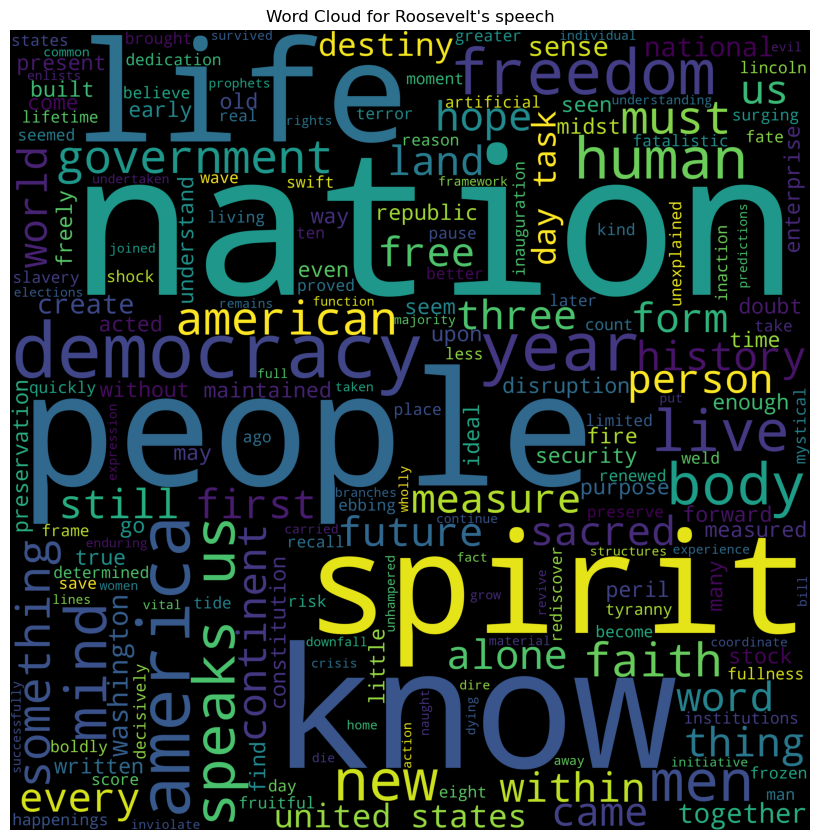

In [163]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(all_words_clean0)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for Roosevelt's speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

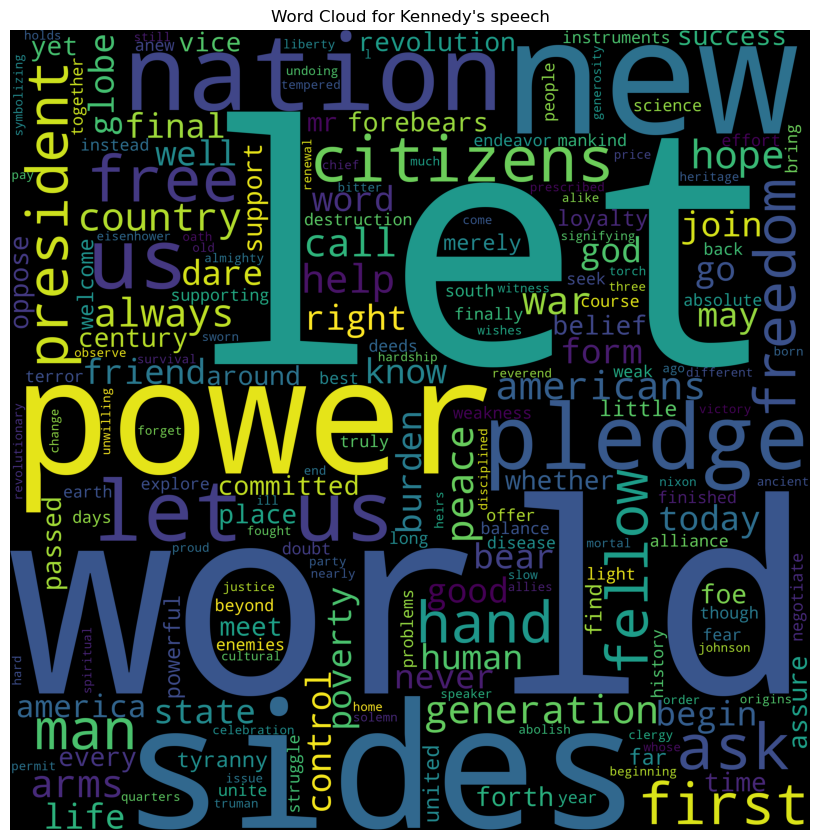

In [164]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(all_words_clean1)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for Kennedy's speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

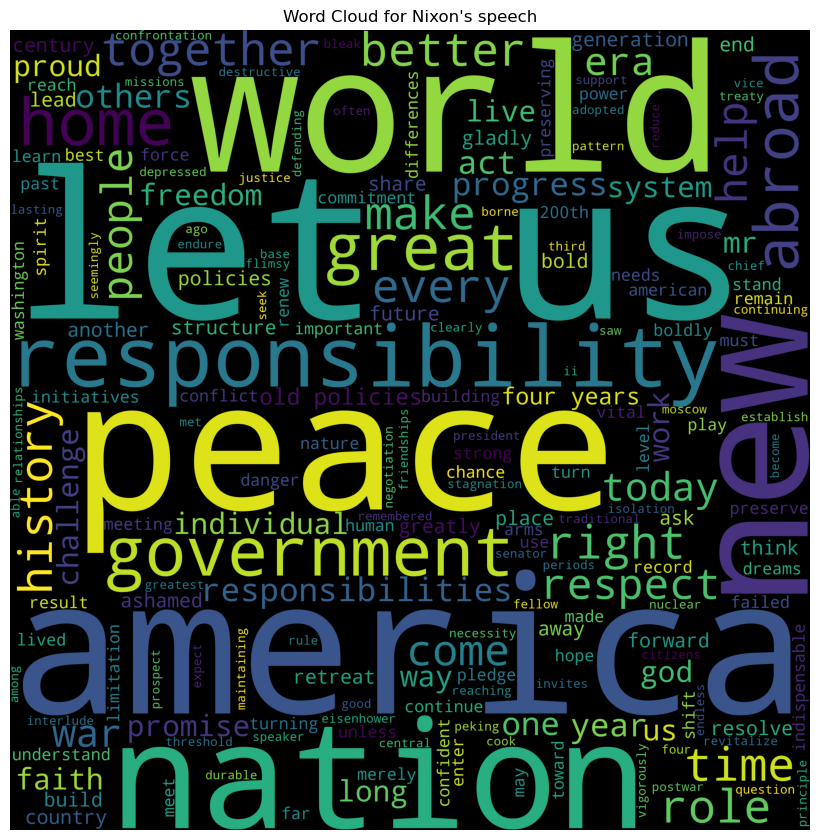

In [165]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(' '.join(all_words_clean2)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.title("Word Cloud for Nixon's speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!